**ABC Testing**
**Ack: Ecommerce AB Testing 2022 Dataset1**
https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1

In [3]:
import pandas as pd 

df = pd.read_csv('C:\\Users\\brosb\\Documents\\FamilyDocuments\\Chem\\PythonLearning\\WW12_2025\\archive (7)\\ecommerce_ab_testing_2022_dataset1\\ab_data.csv')

display(df)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1
...,...,...,...,...,...
294475,734608,45:03.4,control,old_page,0
294476,697314,20:29.0,control,old_page,0
294477,715931,40:24.5,treatment,new_page,0
294478,759899,20:29.0,treatment,new_page,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
df.describe()

,user_id,converted
count,294480.000000,294480.000000
mean,787973.538896,0.119658
std,91210.917091,0.324562
min,630000.000000,0.000000
25%,709031.750000,0.000000
50%,787932.500000,0.000000
75%,866911.250000,0.000000
max,945999.000000,1.000000


In [6]:
df.nunique()

user_id         290585
timestamp        35993
group                2
landing_page         2
converted            2
dtype: int64

In [8]:
df_control = df[df['group'] == 'control']
df_control.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0


In [9]:
df_treatment = df[df['group'] == 'treatment']
df_treatment.head()

,user_id,timestamp,group,landing_page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


In [10]:
print(df_treatment.shape)

(147278, 5)


In [11]:
print(df_control.shape)

(147202, 5)


In [12]:
df_control.describe()

,user_id,converted
count,147202.000000,147202.000000
mean,788123.098035,0.120399
std,91278.896888,0.325429
min,630002.000000,0.000000
25%,709287.000000,0.000000
50%,788053.500000,0.000000
75%,867155.500000,0.000000
max,945998.000000,1.000000


In [13]:
df_treatment.describe()

,user_id,converted
count,147278.000000,147278.000000
mean,787824.056933,0.118918
std,91142.986371,0.323693
min,630000.000000,0.000000
25%,708728.500000,0.000000
50%,787836.000000,0.000000
75%,866692.250000,0.000000
max,945999.000000,1.000000


In [19]:
#Learning from example workbook
#Conversion Rate
df_counts = pd.DataFrame({"CONTROL_COUNT":df[df.group=="control"].converted.value_counts(),
                          "TREATMENT_COUNTS":df[df.group=="treatment"].converted.value_counts(),
                          "CONTROL_RATIO": df[df.group=="control"].converted.value_counts()/len(df[df.group=="control"]),
                          "TREATMENT_RATIO":df[df.group=="treatment"].converted.value_counts()/len(df[df.group=="treatment"])})
df_counts

,CONTROL_COUNT,TREATMENT_COUNTS,CONTROL_RATIO,TREATMENT_RATIO
0,129479,129764,0.879601,0.881082
1,17723,17514,0.120399,0.118918


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

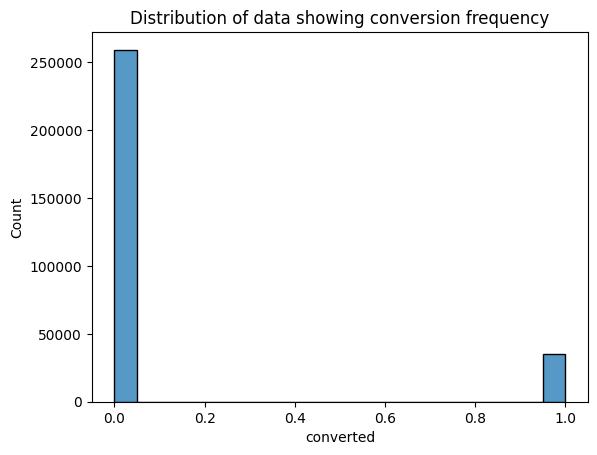

In [22]:
sns.histplot(x="converted", data=df)
plt.title("Distribution of data showing conversion frequency")
plt.show()

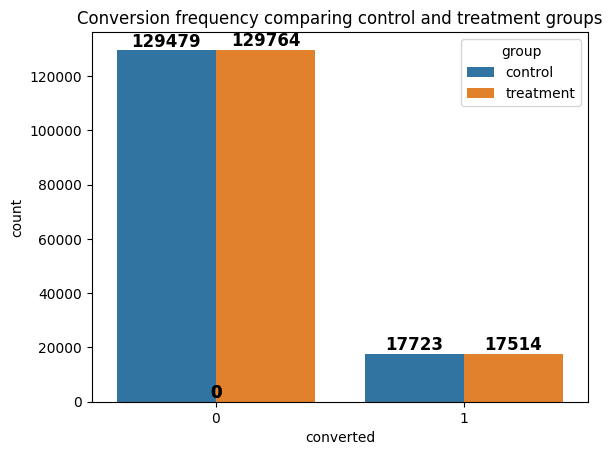

In [24]:
ax = sns.countplot(x="converted", data=df, hue="group")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color = 'black')

plt.title("Conversion frequency comparing control and treatment groups")
plt.show()

In [25]:
df2 = df[((df["group"] == "treatment") & (df["landing_page"] == "new_page")) |
         ((df["group"] == "control") & (df["landing_page"] == "old_page")) ]

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290587 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290587 non-null  int64 
 1   timestamp     290587 non-null  object
 2   group         290587 non-null  object
 3   landing_page  290587 non-null  object
 4   converted     290587 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [29]:
df2_counts = pd.DataFrame({"CONTROL_COUNT":df2[df2.group=="control"].converted.value_counts(),
                          "TREATMENT_COUNTS":df2[df2.group=="treatment"].converted.value_counts(),
                          "CONTROL_RATIO": df2[df2.group=="control"].converted.value_counts()/len(df[df.group=="control"]),
                          "TREATMENT_RATIO":df2[df2.group=="treatment"].converted.value_counts()/len(df[df.group=="treatment"])})
df2_counts

,CONTROL_COUNT,TREATMENT_COUNTS,CONTROL_RATIO,TREATMENT_RATIO
0,127785,128049,0.868093,0.869437
1,17489,17264,0.118810,0.117220


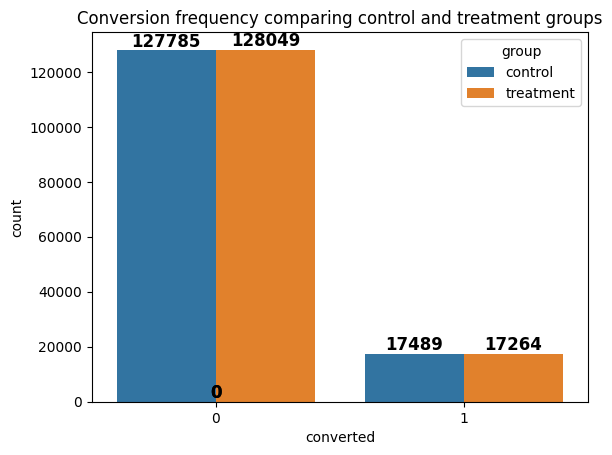

In [30]:
ax = sns.countplot(x="converted", data=df2, hue="group")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color = 'black')

plt.title("Conversion frequency comparing control and treatment groups")
plt.show()